In [23]:
%load_ext autoreload
%autoreload 2

# Test setting map extent of North Polar Stereographic projection 

A standard view of the Arctic (or Antarctic) is often a Polar Stereographic projection with a central latitude of 90 north or south, the north or south poles, centered on the pole of interest and the map extending to some high latitude, often 60.  In ```cartopy```, this can be acheived with ```set_extent([-180,180,60,90], ccrs.NorthPolarStereo())```.  However, what if you want a map that is not centered on the pole.  This notebook explains how to do this.

First we'll install modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature

I'll generate dummy data that will be used for plotting

In [2]:
lat = np.linspace(40., 90., 101)
lon = np.linspace(-180., 180., 720)

lon2d, lat2d = np.meshgrid(lon, lat)
z = np.sin(np.radians(lat2d))**2 + np.cos(np.radians(lon2d))**2
z = np.where((z < 1.) | (z > 1.5), z, np.nan)

I'll illustrate the simple case of plotting this data with the pole centered in the plot 

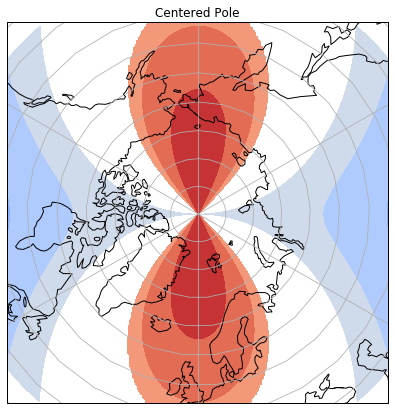

In [12]:
cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=0., vmax=2.)

map_proj = ccrs.NorthPolarStereo()
fig = plt.figure(figsize=[7,7])
ax = plt.subplot(projection=map_proj)
ax.set_extent([-180,180,50,90], ccrs.PlateCarree())

ax.contourf(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

ax.gridlines()
ax.coastlines()
ax.set_title('Centered Pole');


Next we'll plot the same data but with the right and bottom margins aligned with the 60 N latitude line, while the left and top margins are the same as above.  To do this, we need to use projected coordinates, rather than latitude and longitude.  We can do this with the ```transform_point``` method of ```map_proj```

In [21]:
x0, _ = map_proj.transform_point(270, 50, ccrs.PlateCarree())  # Find left boundary in projected coordinates
x1, _ = map_proj.transform_point(90, 65, ccrs.PlateCarree())  # Find right boundary in projected coordinates
_, y0 = map_proj.transform_point(0, 65, ccrs.PlateCarree())  # Find bottom boundary in projected coordinates
_, y1 = map_proj.transform_point(180, 50, ccrs.PlateCarree())  # Find top boundary in projected coordinates

print (f'map_extent = [{x0}, {x1}, {y0}, {y1}]')

map_extent = [-4651194.319071749, 2835721.446215284, -2835721.446215284, 4651194.319071749]


The ```x0, x1, y0, y1``` can then be passed to ```set_extent``` and the new plot generated. 

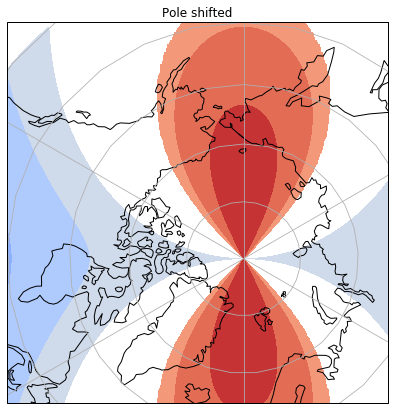

In [22]:
fig = plt.figure(figsize=[7, 7])
ax = plt.subplot(projection=map_proj)
ax.set_extent([x0, x1, y0, y1], map_proj)

ax.contourf(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

ax.gridlines()
ax.coastlines()
ax.set_title('Pole shifted');


The next cell demonstrates how this can be done for multiple plots.

In [ ]:
def generate_basemap(nrows, ncols, index, title=''):
    """
    Helper function to generate Arctic Ocean basemap for Bering Strait heatflux paper
    
    return: axes instance
    """
    map_proj = ccrs.NorthPolarStereo()
    map_extent = [-4651194.319071749, 2835721.446215284, -2835721.446215284, 4651194.319071749]

    ax = plt.subplot(projection=map_proj)
    ax.set_extent(map_extent, map_proj)
    ax.gridlines()
    ax.coastlines()
    
    return ax
    

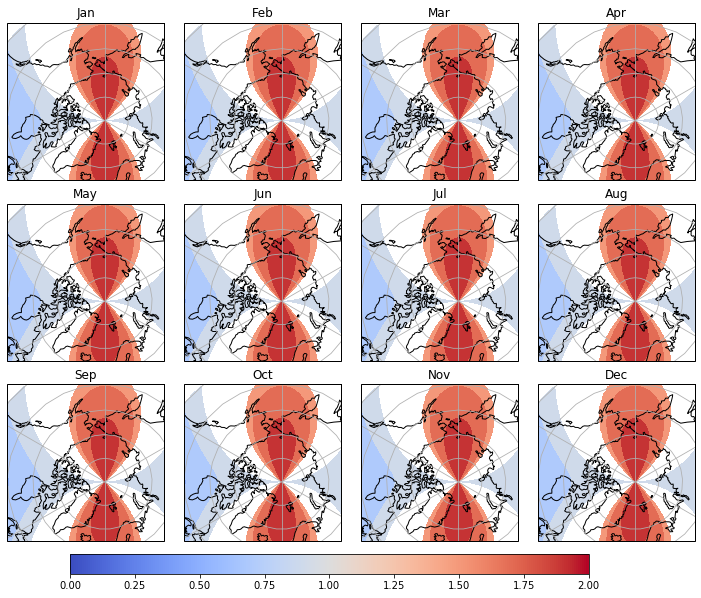

In [28]:
cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=0., vmax=2.)
map_proj = ccrs.NorthPolarStereo()
#map_extent = [-4651194.319071749, 2835721.446215284, -2835721.446215284, 4651194.319071749]
map_extent = [x0, x1, y0, y1]

fig = plt.figure(figsize=[12, 9])

ax = []
monthstr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, mstr in enumerate(monthstr):
    
    ax.append(plt.subplot(3, 4, i+1, projection=map_proj))
    ax[i].set_extent(map_extent, map_proj)
    
    cont = ax[i].contourf(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    ax[i].gridlines()
    ax[i].coastlines()
    ax[i].set_title(mstr)
    
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.15, wspace=0.1)

axc = fig.add_axes([0.175, 0.05, 0.6, 0.03])
cbar = mpl.colorbar.ColorbarBase(axc, orientation='horizontal', norm=norm, cmap=cmap)

plt.show()s 

fig.savefig('test_map_extent_and_boundary.png')